# Red Neuronal con 2 capas intermedias

Integrantes:

Yeison Idarraga Chavarria

Juan Camilo Agudelo Aquite

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
#suppress warnings
warnings.filterwarnings('ignore')

import scipy.io

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/Colab Notebooks/IA/Redes_Neuronales/2 Capas intermedias/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/IA/Redes_Neuronales/2 Capas intermedias


In [ ]:
# Importar funciones de archivos .py
from RandParametros import randParametros
from fming import fmincg # función de optimización
# from organizarBeta import organizarBeta
from sigmoid import sigmoid
from sigmoidGradiente import sigmoidGradiente


In [ ]:
mat = scipy.io.loadmat('datos4.mat')
x_data = mat['X']; #5000 X 400
y_data = mat['y']; #5000 X 1
y_data[y_data == 10] = 0; #cambiamos todas las Y = 10 por Y = 0
#print(y_data[:, 0])

La imagen corrsponde al número: [0]


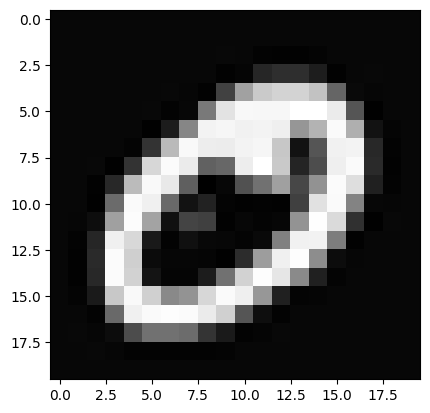

In [ ]:
#Es una celda opcional, para tener un ejemplo para visualizar imagenes
cont = 0
DatSetImage = np.zeros((20,20)) # Es la matriz que contiene cada pixel de la imagen a pintar
ImageNumber = 499 #Número de imagen que quiero visualizar

for i in range(20):
  for j in range(20):
    DatSetImage[j,i] = x_data[ImageNumber,cont]
    cont+=1

plt.imshow(DatSetImage, cmap='gray')
print('La imagen corrsponde al número:',y_data[ImageNumber])

In [ ]:
#Dividir datos en Entrenamiento en 70% y 30%, se entrena con el 70% y se calculan las metricas con el 30%
x_data_30 = np.zeros((0, x_data.shape[1]))
y_data_30 = np.zeros((0, y_data.shape[1]))

x_data_70 = np.zeros((0, x_data.shape[1]))
y_data_70 = np.zeros((0, y_data.shape[1]))

for i in range(0, x_data.shape[0], 500):
    x_data_30 = np.vstack((x_data_30, x_data[i:i+int(0.3*500), :]))
    x_data_70 = np.vstack((x_data_70, x_data[i+int(0.3*500):i+500, :]))

for i in range(0, y_data.shape[0], 500):
    y_data_30 = np.vstack((y_data_30, y_data[i:i+int(0.3*500), :]))
    y_data_70 = np.vstack((y_data_70, y_data[i+int(0.3*500):i+500, :]))

In [ ]:
m = x_data_70.shape[0] # m = 3500
print('m:',m)

Beta1_grad = 0
Beta2_grad = 0
Beta3_grad = 0

tamano_capa_entrada  = 400
tamano_capa_media_1 = 25
tamano_capa_media_2 = 25
num_salidas =  10;

m: 3500


In [ ]:
#Inicializar las matrices Beta con datos random
Beta1_inicial = randParametros(tamano_capa_entrada, tamano_capa_media_1)
Beta2_inicial = randParametros(tamano_capa_media_1, tamano_capa_media_2)
Beta3_inicial = randParametros(tamano_capa_media_2, num_salidas)
parametros_Beta_Iniciales = np.concatenate((Beta1_inicial, Beta2_inicial, Beta3_inicial),axis=None)
# print(parametros_Beta_Iniciales.shape)
parametros_Beta_Iniciales = np.reshape(parametros_Beta_Iniciales,(parametros_Beta_Iniciales.shape[0],1))
# print(parametros_Beta_Iniciales.shape)

In [ ]:
def organizarBeta(tamano_capa_media_1, tamano_capa_media_2, tamano_capa_entrada, num_salidas, parametros_Beta):
    cont = 0
    NumCol1 = tamano_capa_entrada + 1
    NumFil1 = tamano_capa_media_1

    NumCol2 = tamano_capa_media_1 + 1
    NumFil2 = tamano_capa_media_2

    NumCol3 = tamano_capa_media_2 + 1
    NumFil3 = num_salidas

    Beta1 = np.zeros((NumFil1,NumCol1))
    Beta2 = np.zeros((NumFil2,NumCol2))
    Beta3 = np.zeros((NumFil3,NumCol3))

    lens = len(parametros_Beta)
    if lens != 10935:
        parametros_Beta = parametros_Beta[0]
    for i in range(NumFil1):
      for j in range(NumCol1):
        Beta1[i,j] = parametros_Beta[cont,0]
        cont += 1

    for i in range(NumFil2):
      for j in range(NumCol2):
        Beta2[i,j] = parametros_Beta[cont,0]
        cont += 1

    for i in range(NumFil3):
      for j in range(NumCol3):
          Beta3[i,j] = parametros_Beta[cont,0]
          cont += 1

    # print('Beta1:',Beta1.shape)
    # print('Beta2:',Beta2.shape)
    # print('Beta3:',Beta3.shape)
    return(Beta1, Beta2, Beta3)

In [ ]:
[Beta1,Beta2,Beta3] = organizarBeta(tamano_capa_media_1, tamano_capa_media_2, tamano_capa_entrada, num_salidas, parametros_Beta_Iniciales)

# Entrenamiento de la Red Neuronal

In [ ]:
def nnTraining(nn_params, tamano_capa_entrada, tamano_capa_media_1, tamano_capa_media_2, num_salidas, x, y, Lambda, m):
  [Beta1, Beta2, Beta3] = organizarBeta(tamano_capa_media_1, tamano_capa_media_2, tamano_capa_entrada, num_salidas, nn_params)
  # print('Beta1:', Beta1.shape)
  # print('Beta2:', Beta2.shape)
  # print('Beta3:', Beta3.shape)
  acumulador1 = 0
  acumulador2 = 0
  acumulador3 = 0
  J_part_1 = 0
  for t in range(m):
    #Fordward Propagation
    x1 =x[t,:] #1X400

    #De capa 1 a capa 2
    a1 = np.reshape(np.concatenate((1,x1),axis=None),(401,1)) #401x1
    z2 = np.dot(Beta1, a1) #(25,1)
    a2 = sigmoid(z2) #(25,1)
    # print('a1:', a1.shape)
    # print('z2:', z2.shape)
    # print('a2:', a2.shape)

    #De capa 2 a capa 3
    a2 = np.reshape(np.concatenate((1,a2),axis=None),(26,1))# 26X1
    z3 = np.dot(Beta2, a2) # 25x1
    a3 = sigmoid(z3) # 10x1 es la salida

    #De capa 3 a capa 4
    a3 = np.reshape(np.concatenate((1,a3),axis=None),(26,1))# 26X1
    z4 = np.dot(Beta3, a3) # 10x1
    a4 = np.reshape(sigmoid(z4),(10,1)) # 10x1 es la salida

    #Paso intermedio
    y_data_vector = np.zeros((10,1)) # 10x1
    valorY = int(y[t,0]) # Número de la salida que corresponde a la imagen
    y_data_vector[valorY] = 1 # 10x1

    #Back Propagation
    d4 = a4 - y_data_vector #10x1
    # print('d4',d4.shape)
    d3 = np.multiply((np.dot(Beta3[:,1:].transpose(), d4)), np.reshape(sigmoidGradiente(z3),(z3.shape[0], z3.shape[1]))) #25x1
    # print('d3',d3.shape)
    d2 = np.multiply((np.dot(Beta2[:,1:].transpose(), d3)), np.reshape(sigmoidGradiente(z2),(z2.shape[0], z2.shape[1]))) #25x1

    #Acumuladores
    # print('a2',a2.shape)
    # print('d3.transpose()',d3.transpose().shape)
    acumulador1 += np.dot(a1, d2.transpose())
    acumulador2 += np.dot(a2, d3.transpose())
    acumulador3 += np.dot(a3, d4.transpose())
    # print('acumulador1',acumulador1.shape)
    # print('acumulador2',acumulador2.shape)
    # print('acumulador3',acumulador3.shape)

    #Funcion cost(J) parte1
    J_part_1 += np.sum((np.multiply(y_data_vector, np.log(a4)))+(np.multiply((1 - y_data_vector), np.log(1 - a4))))

  #Funcioncost(J)parte2
  sumaB1 = np.sum(np.square(Beta1[:, 1:])) #Es un escalar
  sumaB2 = np.sum(np.square(Beta2[:, 1:])) #Es un escalar
  sumaB3 = np.sum(np.square(Beta3[:, 1:])) #Es un escalar
  J=(-1/m) * J_part_1 + ((Lambda / (2*m)) * (sumaB1 + sumaB2 + sumaB3)) #Es un escalar

  #Calculamos gradientes
  tempBeta1 = np.copy(Beta1)
  tempBeta1[:, 0] = 0
  Beta1_grad = (1 / m) * (acumulador1.transpose() + (Lambda * tempBeta1)) # 25 x 401
  # print(Beta1_grad.shape)
  tempBeta2 = np.copy(Beta2)
  tempBeta2[:, 0] = 0
  Beta2_grad = (1 / m) * (acumulador2.transpose() + (Lambda * tempBeta2)) # 25x26
  # print(Beta2_grad.shape)

  tempBeta3 = np.copy(Beta3)
  tempBeta3[:, 0] = 0
  Beta3_grad = (1 / m) * (acumulador3.transpose() + (Lambda * tempBeta3)) # 10x26
  # print(Beta3_grad.shape)

  grad = np.concatenate((Beta1_grad, Beta2_grad, Beta3_grad), axis=None)#(10935,)
  grad = np.reshape(grad, (grad.shape[0], 1)) # 10935 x 1
  # print('grad:', grad.shape)

  retornar = [J, grad]

  return retornar

In [ ]:
#Celda de prueba
Lambda = 0.1
retornar = nnTraining(parametros_Beta_Iniciales, tamano_capa_entrada, tamano_capa_media_1, tamano_capa_media_2, num_salidas, x_data_70, y_data_70, Lambda, m)
print(retornar[0])

7.2413589201468715


In [ ]:
def costFunction(p):
    ret = nnTraining(p, tamano_capa_entrada, tamano_capa_media_1, tamano_capa_media_2, num_salidas, x_data_30, y_data_30, Lambda, m)
    return ret

In [ ]:
m = x_data_30.shape[0]
options = {'maxiter' : 50}
Lambda = 0.1
parametros_Beta_Finales = fmincg(costFunction, parametros_Beta_Iniciales, options)

Iteration 1 | Cost: 3.300748 
Iteration 2 | Cost: 3.259750 
Iteration 3 | Cost: 3.252778 
Iteration 4 | Cost: 3.252653 
Iteration 5 | Cost: 3.252236 
Iteration 6 | Cost: 3.251799 
Iteration 7 | Cost: 3.238987 
Iteration 8 | Cost: 3.190429 
Iteration 9 | Cost: 3.123810 
Iteration 10 | Cost: 3.048666 
Iteration 11 | Cost: 2.930467 
Iteration 12 | Cost: 2.711751 
Iteration 13 | Cost: 2.519772 
Iteration 14 | Cost: 2.397523 
Iteration 15 | Cost: 2.248361 
Iteration 16 | Cost: 2.109326 
Iteration 17 | Cost: 2.049109 
Iteration 18 | Cost: 2.040493 
Iteration 19 | Cost: 1.873283 
Iteration 20 | Cost: 1.804012 
Iteration 21 | Cost: 1.756469 
Iteration 22 | Cost: 1.657087 
Iteration 23 | Cost: 1.559150 
Iteration 24 | Cost: 1.528323 
Iteration 25 | Cost: 1.511547 
Iteration 26 | Cost: 1.372302 
Iteration 27 | Cost: 1.222870 
Iteration 28 | Cost: 1.136734 
Iteration 29 | Cost: 1.113252 
Iteration 30 | Cost: 1.020626 
Iteration 31 | Cost: 0.985727 
Iteration 32 | Cost: 0.942729 
Iteration 33 | Co

In [ ]:
[Beta1, Beta2, Beta3] = organizarBeta(tamano_capa_media_1, tamano_capa_media_2, tamano_capa_entrada, num_salidas, parametros_Beta_Finales)
print(len(parametros_Beta_Finales))
# print('Beta1:',Beta1.shape)
# print('Beta2:',Beta2.shape)
# print('Beta3:',Beta3.shape)

3


In [ ]:
#Cálcular Matriz de Confusión con el 30% de los datos
m = len(x_data_30)
matrizConf = np.zeros((10,10))

for t in range(m):
  #Fordward propagation
  x1 =x_data_30[t,:] #1X400

  #De capa 1 a capa 2
  a1 = np.reshape(np.concatenate((1,x1),axis=None),(401,1)) #401x1
  z2 = np.dot(Beta1, a1) #(25,1)
  a2 = sigmoid(z2) #(25,1)

  #De capa 2 a capa 3
  a2 = np.reshape(np.concatenate((1,a2),axis=None),(26,1))# 26X1
  z3 = np.dot(Beta2, a2) # 25x1
  a3 = sigmoid(z3) # 10x1 es la salida

  #De capa 3 a capa 4
  a3 = np.reshape(np.concatenate((1,a3),axis=None),(26,1))# 26X1
  z4 = np.dot(Beta3, a3) # 10x1
  a4 = np.reshape(sigmoid(z4),(10,1)) # 10x1 es la salida

  posicion = np.argmax(a4)
  matrizConf[int(y_data_30[t]), int(posicion)] = matrizConf[int(y_data_30[t]), int(posicion)] + 1

print(matrizConf)


[[148.   0.   0.   1.   0.   0.   0.   0.   1.   0.]
 [  0. 145.   1.   0.   0.   3.   0.   0.   0.   1.]
 [  0.   1. 140.   3.   0.   1.   2.   0.   2.   1.]
 [  0.   0.   3. 134.   0.   6.   1.   1.   3.   2.]
 [  0.   1.   0.   0. 146.   1.   2.   0.   0.   0.]
 [  0.   0.   2.   7.   1. 136.   4.   0.   0.   0.]
 [  2.   1.   1.   0.   0.   1. 145.   0.   0.   0.]
 [  0.   0.   0.   0.   2.   0.   0. 146.   0.   2.]
 [  1.   2.   2.   1.   0.   2.   0.   0. 142.   0.]
 [  2.   0.   0.   4.   5.   1.   0.   4.   0. 134.]]


In [ ]:
#Cálculo de la presición del modelo, según la Matríz de confusión

acumuladorMatriz = 0
for i in range(10):
  acumuladorMatriz += int(matrizConf[i,i])

exactitud = round(acumuladorMatriz / m, 4)
print('Accuracy:', exactitud)
print('Porcentaje de excatitud del modelo:', round(exactitud * 100, 4), '%')

Accuracy: 0.944
Porcentaje de excatitud del modelo: 94.4 %


Teniendo en cuenta los programas anteriores, ¿cómo evaluaría (o qué haría para conocer) si se presentan los problemas de overfitting y underfitting? Justifique su respuesta (no es necesario implementar código para dar esta respuesta)

R:// El Overfitting y el Underfitting son dos problemas comunes en el entrenamiento de modelos de redes neuronales y, en general, en el aprendizaje automático (machine learning). Ambos se refieren a situaciones en las que el modelo no generaliza bien a datos que no ha visto durante el entrenamiento, pero se manifiestan de manera diferente:



---


**Overfitting (Sobreajuste):**
Ocurre cuando el modelo se ajusta demasiado a los datos de entrenamiento. En otras palabras, el modelo aprende no solo los patrones subyacentes en los datos, sino también el ruido y las fluctuaciones aleatorias en los datos de entrenamiento.

**Características:**

* El rendimiento en el conjunto de entrenamiento suele ser excelente.
* El rendimiento en el conjunto de validación (o datos nuevos) es significativamente peor que en el conjunto de entrenamiento.
* El modelo puede capturar detalles específicos de los datos de entrenamiento que no son generalizables.
* Se observan oscilaciones en las curvas de pérdida durante el entrenamiento.
Causas: Overfitting puede ser causado por una arquitectura de modelo muy compleja en relación con la cantidad de datos de entrenamiento disponibles. También puede ser causado por una falta de regularización (por ejemplo, falta de regularización L1 o L2) o por entrenar durante demasiadas épocas.



---


**Underfitting (Subajuste):**

Definición: El underfitting ocurre cuando el modelo es demasiado simple para capturar los patrones en los datos de entrenamiento. En esencia, el modelo no puede aprender los patrones subyacentes en los datos y realiza un rendimiento deficiente tanto en el conjunto de entrenamiento como en el conjunto de validación.

**Características:**

* El rendimiento en el conjunto de entrenamiento es deficiente.
* El rendimiento en el conjunto de validación también es deficiente.
* El modelo no puede capturar adecuadamente los patrones en los datos.
* Se observa un alto error de entrenamiento y un alto error de validación.

**Causas:**
Puede ser causado por una arquitectura de modelo demasiado simple o por una falta de entrenamiento adecuado (por ejemplo, un número insuficiente de épocas de entrenamiento).



---


El objetivo en el entrenamiento de modelos de redes neuronales es encontrar un equilibrio entre el overfitting y el underfitting, donde el modelo sea lo suficientemente complejo para capturar patrones importantes pero no tan complejo como para ajustarse al ruido. Esto se logra mediante técnicas como la selección de arquitecturas adecuadas, la regularización, el ajuste de hiperparámetros y la validación cruzada.

Existen 2 formas usadas muy comunmente para detectar estos problemas, y esos son:

**Curvas de pérdida:** Trazar las curvas de pérdida para el conjunto de entrenamiento y el conjunto de validación en función del número de épocas. Esto te ayudará a identificar si se están presentando problemas de overfitting o underfitting.

* **Overfitting:** Si ves que la pérdida en el conjunto de entrenamiento sigue disminuyendo mientras que la pérdida en el conjunto de validación comienza a aumentar o se estanca, es una señal de overfitting. El modelo está aprendiendo a ajustarse demasiado a los datos de entrenamiento y no se está generalizando bien a nuevos datos.

* Underfitting: Si tanto la pérdida en el conjunto de entrenamiento como en el conjunto de validación son altas y no mejoran significativamente a medida que aumenta el número de épocas, es una señal de underfitting. El modelo es demasiado simple o no se ha entrenado lo suficiente para capturar los patrones en los datos.

**Precisión en conjunto de prueba:** Una vez que hayas entrenado el modelo y ajustado los hiperparámetros utilizando el conjunto de validación, evalúa el rendimiento final del modelo en el conjunto de prueba. Si la precisión en el conjunto de prueba es sustancialmente inferior a la precisión en el conjunto de entrenamiento, podría ser una indicación de overfitting. Esta presición la podemos tomar de la matriz de confusión, sumando todos los números de la diagonal principal, y dividiendo por el total de datos usados para general la matriz, como se puede ver en el bloque de código siguiente a la matriz de confusión.